# Getting stock prices

In [2]:
# Imports
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd

## Hiscox company data

In [3]:
# Read in initial company data
def read_company_data():
    """
    Read hiscox challenge company data.
    """
    df = pd.read_csv('../data/Company_NAIC.csv')
    return df

In [11]:
hiscox_data = read_company_data()

In [13]:
print(hiscox_data['Company Name'].head())

0    SAVERS PROPERTY & CASUALTY INSURANCE COMPANY
1                          CENTURY SURETY COMPANY
2             PACIFIC EMPLOYERS INSURANCE COMPANY
3                   CAPITOL INDEMNITY CORPORATION
4          AMALGAMATED CASUALTY INSURANCE COMPANY
Name: Company Name, dtype: object


In [14]:
print(len(hiscox_data['Company Name'].unique()))

430


In [15]:
companies = list(hiscox_data['Company Name'].unique())

In [16]:
import requests

# Some functions
def requestURL(inputString):
    """Wrapper function for requesting a url.
    :param inputString: url of webpage to be requested
    :returns: html of requested webpage"""
    # Type-checking
    if not isinstance(inputString, str):
        raise TypeError('inputString must be a string') 

    r = requests.get(url=inputString)
    if r.status_code != 200:
        raise Exception('Page request unsuccessful: status code {0}'.format(
            r.status_code))
    return(r.text)

# Text functions
def restrict(inputString, startStr=None, endStr=None):
    """Useful text parsing function to get substrings,
    based on substrings before an after.
    :param inputString: string to be stripped down
    :param startStr: 
    :param endStr: 
    :returns: string that has been stripped down"""
    # Type-checking
    if not isinstance(inputString, str):
        raise TypeError('inputString must be a string')

    startIndex = inputString.index(startStr) + len(startStr) if startStr else 0
    reducedStr = inputString[startIndex:]
    endIndex = reducedStr.index(endStr) if endStr else len(reducedStr)
    return(reducedStr[:endIndex])

def normalise(inputString):
    """String normalisation.
    :param inputString: string to be normalised
    :returns: normalised string"""
    return inputString.lower().strip().replace(' ', '_')

In [ ]:
# Get list of companies

# Get parent companies

# Get stock tickers

# Get stock prices

company_data = list()
for comp in companies:
    d = {'company': comp}
    d['company_norm'] = normalise(comp)
    
    company_data.append(d)

## Ticker symbols

In [5]:
# Read company-ticker data
# Taken from https://www.nasdaq.com/screening/company-list.aspx
def read_ticker_data(quiet=True):
    """
    Read in csv files to match up tickers and company names.
    Return total dataframe.
    """
    amex = pd.read_csv('../data/amex.csv')
    nasdaq = pd.read_csv('../data/nasdaq.csv')
    nyse = pd.read_csv('../data/nyse.csv')

    df = pd.concat([amex, nasdaq, nyse])

    if not quiet:
        print(df.shape)
        print(df.columns.values)
    return df

In [6]:
def read_more_ticker_data():
    """
    Read in csv file of ticker-company names.
    Taken from https://investexcel.net/all-yahoo-finance-stock-tickers/
    """
    df = pd.read_csv('../data/ticker_symbols.csv')
    return df

In [12]:
ticker_data = read_more_ticker_data()
print(ticker_data.head())
print(ticker_data.shape)
print(ticker_data[['ticker', 'name']].head())

  ticker                                     name exchange  \
0   OEDV  Osage Exploration and Development, Inc.      PNK   
1   AAPL                               Apple Inc.      NMS   
2    BAC              Bank of America Corporation      NYQ   
3   AMZN                         Amazon.com, Inc.      NMS   
4      T                                AT&T Inc.      NYQ   

                      category country  
0                          NaN     USA  
1         Electronic Equipment     USA  
2           Money Center Banks     USA  
3  Catalog & Mail Order Houses     USA  
4  Telecom Services - Domestic     USA  
(106328, 5)
  ticker                                     name
0   OEDV  Osage Exploration and Development, Inc.
1   AAPL                               Apple Inc.
2    BAC              Bank of America Corporation
3   AMZN                         Amazon.com, Inc.
4      T                                AT&T Inc.


## Collecting stock prices

In [8]:
# Get yahoo finance data for tickers
def get_data_from_tickers(tickers, start='2015-01-01', end='2018-12-31'):
    """
    Take a list of stock tickers, and get stock price data for them.
    """
    panel_data = data.DataReader(tickers, 'yahoo', start, end)
    close = panel_data['Close']
    all_weekdays = pd.date_range(start=start, end=end, freq='B')
    close = close.reindex(all_weekdays)
    close = close.fillna(method='ffill')
    return all_weekdays, close

In [9]:
# Run
def runner():
    """
    Function to run everything
    """
    # Get list of tickers
    tickers = ['AAPL', 'MSFT', '^GSPC']
    all_weekdays, close = get_data_from_tickers(tickers)
    # Print outputs
    print(all_weekdays)
    print(close.head(10))

    msft = close.loc[:, 'MSFT']

    # Construct rolling averages
    short_rolling_msft = msft.rolling(window=20).mean()
    long_rolling_msft = msft.rolling(window=100).mean()

    # Create plots of rolling averages
    fig, ax = plt.subplots(figsize=(16, 9))

    ax.plot(msft.index, msft, label='MSFT')
    ax.plot(short_rolling_msft.index, short_rolling_msft, label='20-day rolling')
    ax.plot(long_rolling_msft.index, long_rolling_msft, label='100-day rolling')

    ax.set_xlabel('date')
    ax.set_ylabel('adjusted closing price ($)')
    ax.legend()
    plt.show()

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-05', '2015-01-06',
               '2015-01-07', '2015-01-08', '2015-01-09', '2015-01-12',
               '2015-01-13', '2015-01-14',
               ...
               '2018-12-18', '2018-12-19', '2018-12-20', '2018-12-21',
               '2018-12-24', '2018-12-25', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', length=1043, freq='B')
Symbols           AAPL       MSFT        ^GSPC
2015-01-01         NaN        NaN          NaN
2015-01-02  109.330002  46.759998  2058.199951
2015-01-05  106.250000  46.330002  2020.579956
2015-01-06  106.260002  45.650002  2002.609985
2015-01-07  107.750000  46.230000  2025.900024
2015-01-08  111.889999  47.590000  2062.139893
2015-01-09  112.010002  47.189999  2044.810059
2015-01-12  109.250000  46.599998  2028.260010
2015-01-13  110.220001  46.360001  2023.030029
2015-01-14  109.800003  45.959999  2011.270020


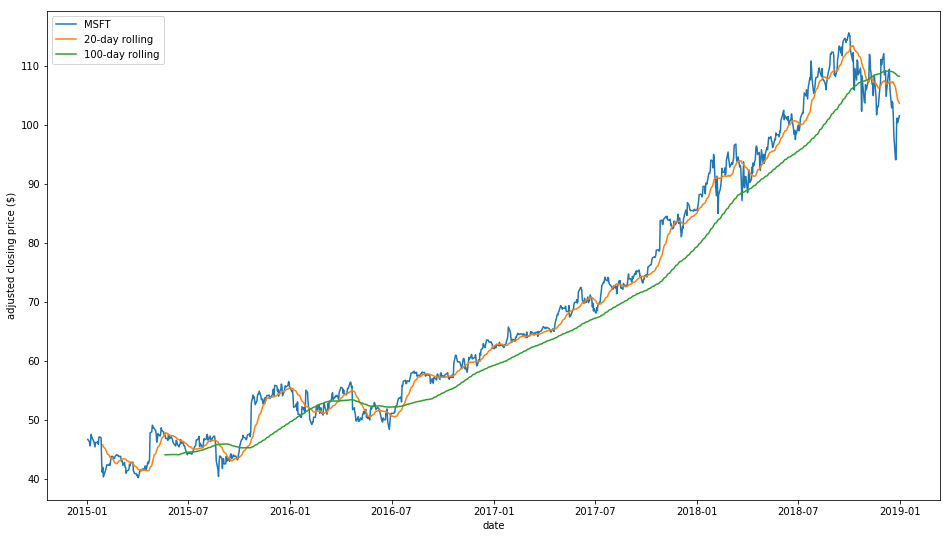

In [10]:
runner()